# Logistic Neuron
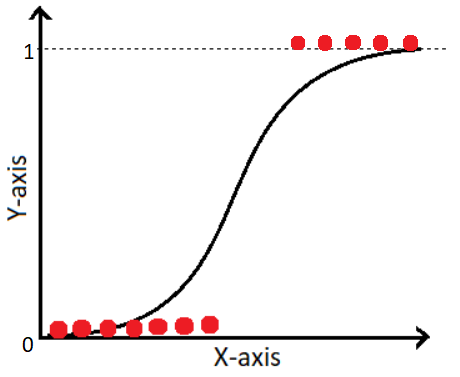

# Overview
Logistic regression is a popular classification algorithm in machine learning that is used to predict the probability of a binary outcome, such as yes or no, true or false, or 0 or 1. 

The logistic regression algorithm works by first calculating a weighted sum of the input variables, using a set of coefficients or weights that are learned during training. This weighted sum is then transformed using a sigmoid or logistic function, which maps the output to a range between 0 and 1, representing the probability of the positive class.

# Advantage

1. Computationally efficient algorithm and can be trained on large datasets.
2. Easy to implement and simple conceptually.

# Disadvantage
1. Limited to binary classification problems and may not be suitable for more complex tasks or datasets with multiple classes. 

# Data

The Wisconsin Breast Cancer Dataset is a collection of medical data on breast cancer patients, at the University of Wisconsin Hospitals. The dataset contains information on 569 breast cancer patients and includes measurements of 30 different features of their cancer cells, such as radius, texture, and concavity.

The dataset is commonly used as a benchmark for machine learning algorithms for classification tasks, particularly in binary classification of malignant and benign tumors. The goal of the classification task is to predict whether a given tumor is malignant or benign based on the measurements of its features.

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
import warnings
warnings.filterwarnings('ignore')

In this analysis, we will explore the relationship between two key features of breast cancer cells, the radius mean and concave mean, and how these features can be used to differentiate between cancer cells that are either benign or malignant. 

[Text(0.5, 1.0, 'Visualization of data'),
 Text(0.5, 0, 'Radius mean'),
 Text(0, 0.5, 'Concave points mean')]

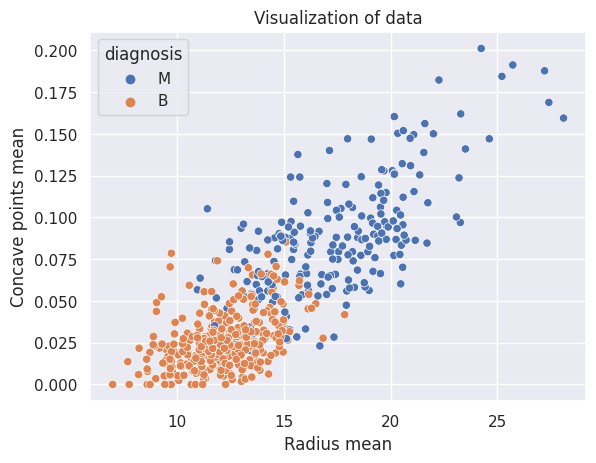

In [2]:
sns.set_theme() 
df = pd.read_csv("WiscosinBreastCancerDiagnostic.csv")

sns.scatterplot(data=df, x="radius_mean", y="concave points_mean", hue="diagnosis").set(title='Visualization of data', 
                                        xlabel='Radius mean', 
                                        ylabel='Concave points mean')


In the non-linearly separable case, the probability of selecting a malignant cell is higher than the probability of selecting a benign cell when the radius mean is less than 15. To address this, we can label each benign cell as 0 and each malignant cell as 1. Then, we can use only the radius mean as our feature measurement.

[Text(0.5, 1.0, 'Visualization of data'),
 Text(0.5, 0, 'Radius mean'),
 Text(0, 0.5, 'Cancer label')]

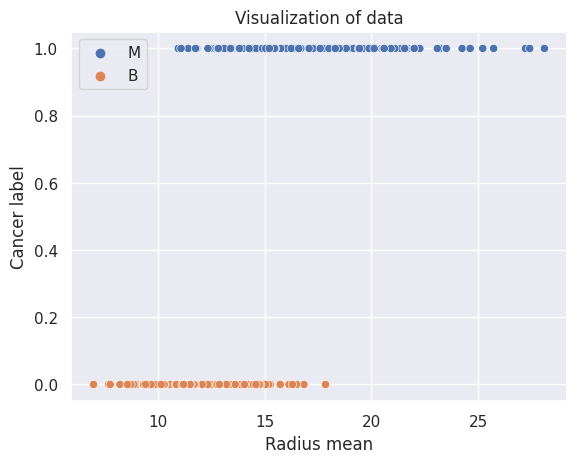

In [3]:
# Store the diagnosis result, either Malignant or Benign and convert them to nuemric
y = df.diagnosis.values
y = np.where(y == 'B', 0, 1)

# Store the desired feature measurements in the matrix X
X = df.radius_mean.values
label = df.diagnosis.values

sns.scatterplot(x=X, y=y, hue=label).set(title='Visualization of data', 
                                         xlabel='Radius mean', 
                                         ylabel='Cancer label')

Notice that the data can classified by using a sigmoid function visualized below. In binary classification problems, the sigmoid function is commonly used to map the output of a linear model to a probability score between 0 and 1, which can be interpreted as the likelihood of belonging to the positive class. The sigmoid function takes any real-valued number and "squashes" it to a range between 0 and 1, using the following mathematical formula:

σ(z) = 1 / (1 + e^(-z))

When the input to the sigmoid function is positive, the output is closer to 1, indicating a higher probability of belonging to the positive class. Conversely, when the input is negative, the output is closer to 0, indicating a higher probability of belonging to the negative class. When the input is 0, the output is exactly 0.5, indicating equal probability of belonging to either class.

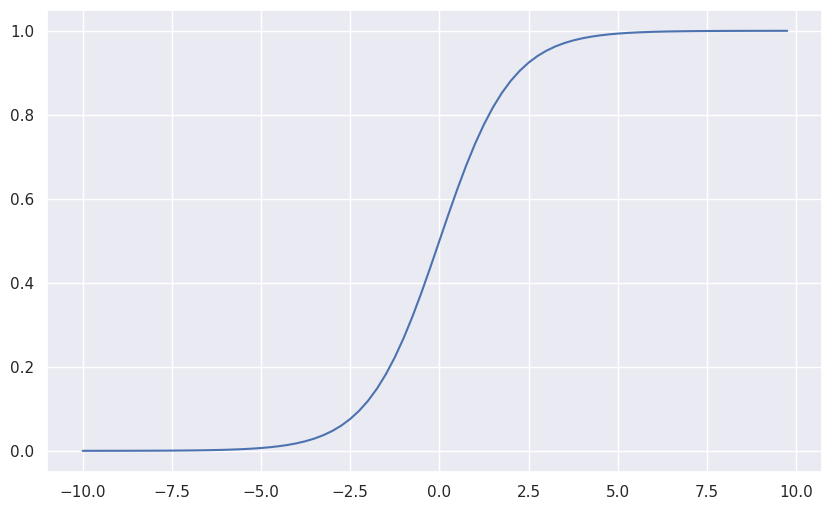

In [4]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

sig_range = np.arange(-10, 10, .25)
plt.figure(figsize=(10, 6))
plt.plot(sig_range, sigmoid(sig_range))

We made a Python class for the logistic neuron algorithm that stores scaling, epochs, and weights. It includes training, input, and predict methods for classification.

In [5]:
class LogisticNeuron:
    
    # Initialize class
    def __init__(self, activation_func, cost_func, learning_rate = .05, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.activation_func = activation_func
        self.cost_func = cost_func
        
    def initWeightBias(self, X, y):
        n_features = X.shape[1]
        self.weights = np.random.rand(n_features)
        self.bias = np.random.rand()
        
    def predict(self, X):
        output = np.dot(X, self.weights) + self.bias
        pred_output = self.activation_func(output)
        return pred_output
        
    def train(self, X, y):
        self.initWeightBias(X, y)
        self.errors_ = []
        n_samples = X.shape[0]
        for epo in range(self.epochs):
            errors = 0
            for x_i, y_i in zip(X, y):
                y_pred = self.predict(x_i)
                update = self.learning_rate * (y_pred - y_i)
                # Gradient descent 
                self.weights = self.weights - update * x_i
                self.bias = self.bias - update
                errors = errors + self.cost_func(y_pred, y_i)
            self.errors_.append(errors/n_samples)

Cross-entropy loss is a commonly used loss function in logistic regression and other binary classification models. It measures the difference between the predicted probability of belonging to the positive class and the actual label which is either 0 or 1.

In logistic regression, the model predicts the probability of belonging to the positive class using a sigmoid function, which maps the output of a linear model to a probability score between 0 and 1. The cross-entropy loss function is then defined as:

L(y, ŷ) = -y * log(ŷ) - (1-y) * log(1-ŷ)



In [6]:
def cross_entropy_loss(y_pred, y):
    return - y*np.log(y_pred) - (1 - y)*np.log(1 - y_pred)

We create an instance of the Logistic neuron class and train this instance.

In [9]:
# Extract and reshape data
y = df.diagnosis.values
y = np.where(y == 'B', 0, 1)
X = df.radius_mean.values
X = X.reshape(-1, 1)

logistic_neutron = LogisticNeuron(activation_func = sigmoid, cost_func = cross_entropy_loss)
logistic_neutron.train(X, y)

We plot the predicted values against the a range of pseudo input data. Ideally, the predicted values should follow a sigmoid curve.



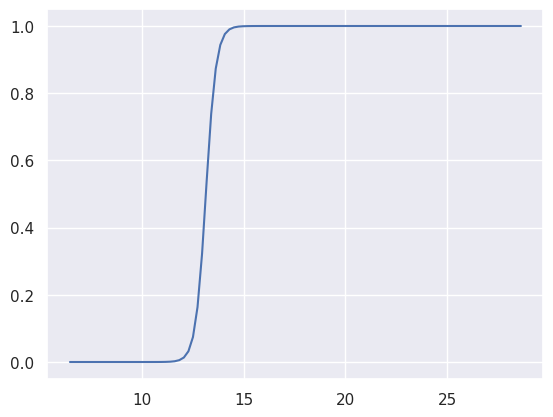

In [10]:
domain = np.linspace(np.min(X) - .5, np.max(X) + .5, 100)
domain_pred = logistic_neutron.predict(domain.reshape(-1, 1))
plt.plot(domain, domain_pred)
plt.show()

We can overlay our data onto our previous sigmoid plot to see how accurate our model is. The less deviation the data is to our predicted sigmoid curve, the more accurate our model is.

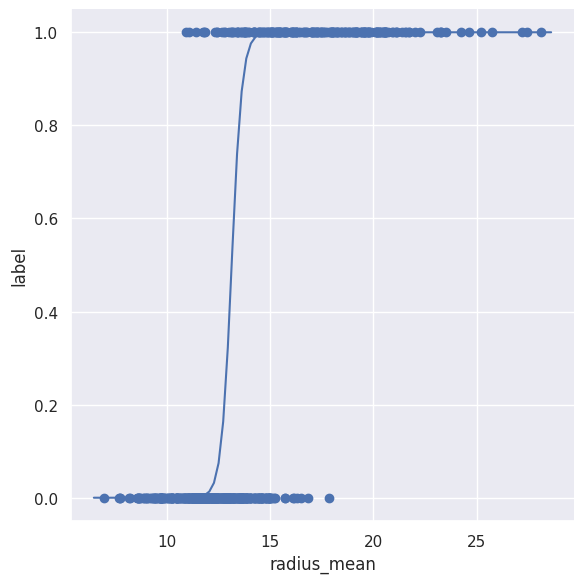

In [11]:
df['label'] = y
g = sns.FacetGrid(df, height = 6)
g = g.map(plt.scatter, "radius_mean", "label")
plt.plot(domain, domain_pred)
plt.show()


Now we visualize how the errors of our percetron changes over many epoches.

[Text(0.5, 1.0, 'Errors over epochs'),
 Text(0.5, 0, 'Number of epochs'),
 Text(0, 0.5, 'MSE')]

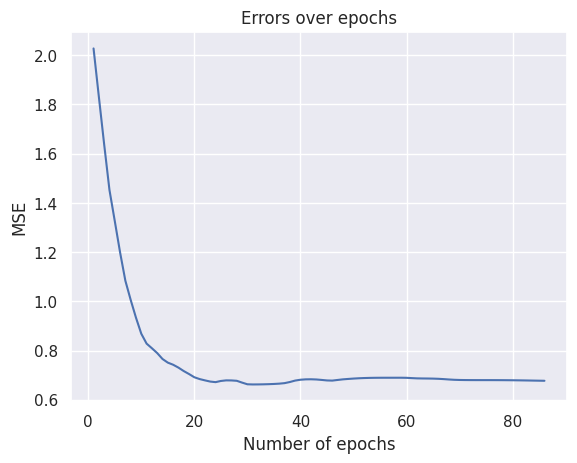

In [12]:
x_axis = range(1, len(logistic_neutron.errors_)+1)
y_axis = logistic_neutron.errors_
sns.lineplot(x=x_axis, y=y_axis).set(title='Errors over epochs', 
                                         xlabel='Number of epochs', 
                                         ylabel='MSE')


We can plot the decision boundary to see our linearly separate our data is.

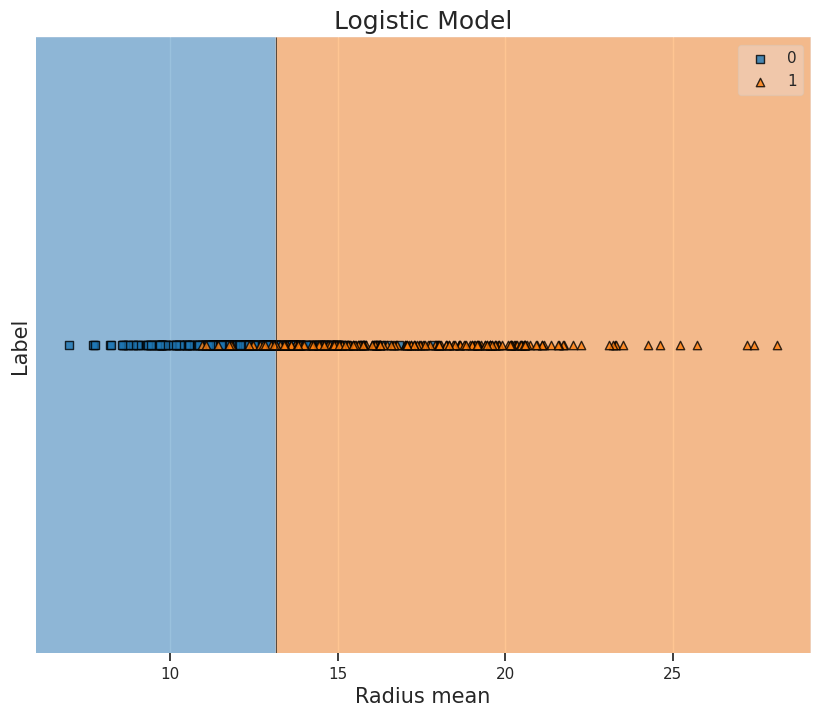

In [13]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = logistic_neutron)
plt.title("Logistic Model", fontsize = 18)
plt.xlabel("Radius mean", fontsize = 15)
plt.ylabel("Label", fontsize = 15)
plt.show()

For the most parts, our model is pretty accurate, excepts for points that near the decision boundary. We can now try if using two inputs improve our model instead of a single input i.e. radius mean.

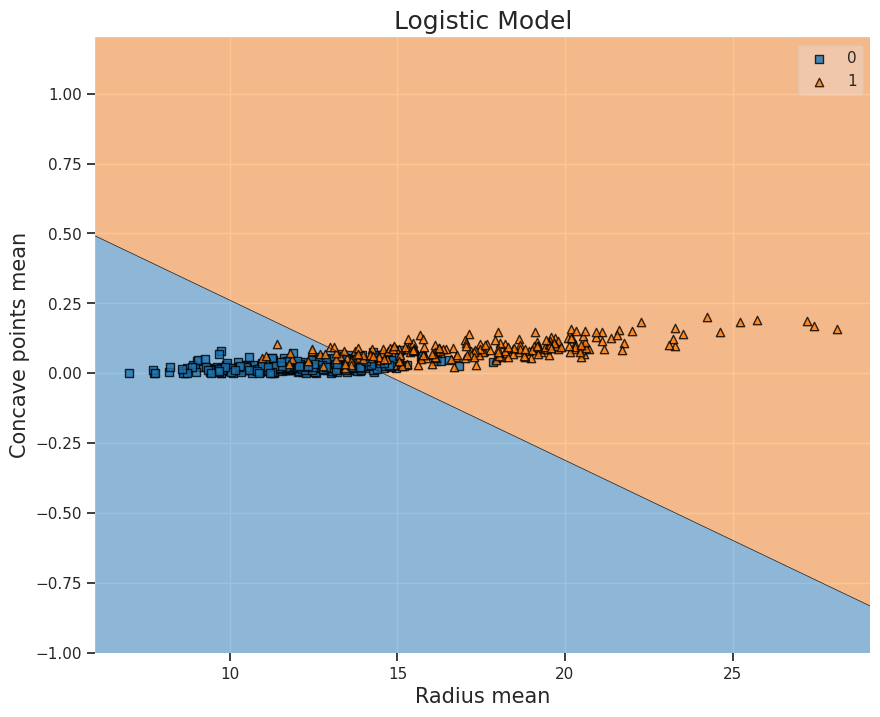

In [14]:
# Use two variable
X_2 = df[["radius_mean", "concave points_mean"]].values
y_2 = df.diagnosis.values
y_2 = np.where(y_2 == 'B', 0, 1)

# Create instance and train the model
logistic_neutron_2 = LogisticNeuron(activation_func = sigmoid, cost_func = cross_entropy_loss)
logistic_neutron_2.train(X_2, y_2)

# Plot decision boundary
plt.figure(figsize = (10, 8))
plot_decision_regions(X_2, y_2, clf = logistic_neutron_2)
plt.title("Logistic Model", fontsize = 18)
plt.xlabel("Radius mean", fontsize = 15)
plt.ylabel("Concave points mean", fontsize = 15)
plt.show()

Our model is better, but not my much due to how linearly unseparable our data is. We can quantify and compare the performance of our two models by plotting the erros over epoches.




[Text(0.5, 1.0, 'Errors over epochs'),
 Text(0.5, 0, 'Number of epochs'),
 Text(0, 0.5, 'MSE')]

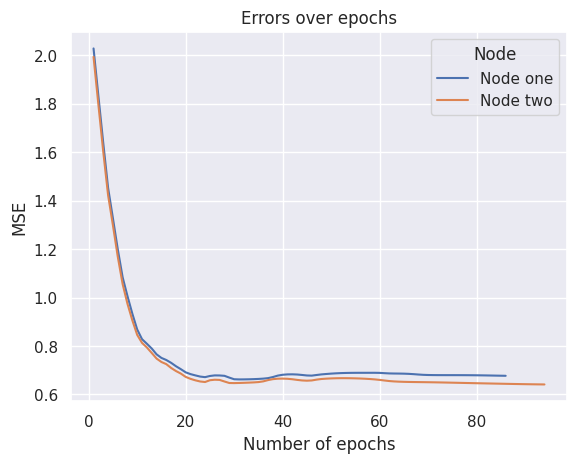

In [15]:
x_axis = range(1, len(logistic_neutron.errors_)+1)
y_axis = logistic_neutron.errors_
y_axis_2 = logistic_neutron_2.errors_

errors_ = pd.DataFrame({'Number of epochs': x_axis,
                   'Node one': y_axis,
                   'Node two': y_axis_2})
errors_ = pd.melt(errors_, ['Number of epochs'])
errors_.rename(columns = {'variable':'Node'}, inplace = True)

sns.lineplot(x='Number of epochs', y='value', hue='Node', 
             data=errors_).set(title='Errors over epochs', 
                                                      xlabel='Number of epochs', 
                                                      ylabel='MSE')

# Conclusion
It seems like having two input variables instead of one only slightly improve our predicition model. Overall, the performance of our logistic models is heavily dependent on how linearly separable our input variables are.